In [2]:
!pip install roboflow
!pip install ultralytics
!pip install ultralytics[explorer]
!pip install -U pyarrow==10

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.2/70.2 kB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.4 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: cycler
    Found existing installation: cycler

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 716.0/716.0 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 35.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.6/21.6 MB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 55.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.2/35.2 MB 13.8 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver

In [3]:
from ultralytics import YOLO

In [4]:
pretrained_model = YOLO('yolov8n-cls.pt')  # load a pretrained model
results = pretrained_model('https://ultralytics.com/images/bus.jpg',save=True)  # predict on an image

100%|██████████| 5.30M/5.30M [00:00<00:00, 66.6MB/s]


100%|██████████| 476k/476k [00:00<00:00, 12.8MB/s]


100%|██████████| 755k/755k [00:00<00:00, 16.1MB/s]

image 1/1 /content/bus.jpg: 224x224 minibus 0.54, police_van 0.24, trolleybus 0.06, golfcart 0.02, streetcar 0.02, 3.0ms
Speed: 57.5ms preprocess, 3.0ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
Results saved to runs/classify/predict


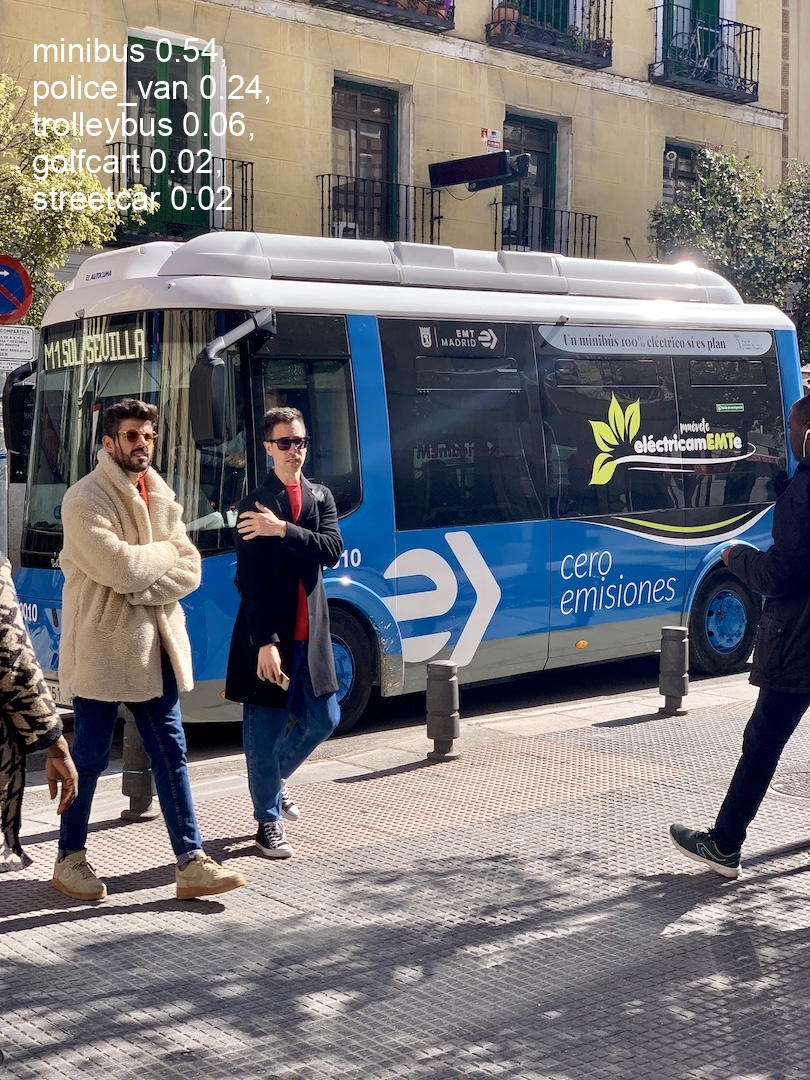

In [5]:
from IPython.display import Image
Image('/content/runs/classify/predict/bus.jpg')

In [6]:
from roboflow import Roboflow
rf = Roboflow(api_key="AiYJ9AMLI2t1DCtkafGg")
project = rf.workspace("roboflow-universe-projects").project("banana-ripeness-classification")
dataset = project.version(4).download("folder")

# from roboflow import Roboflow
# rf = Roboflow(api_key="AiYJ9AMLI2t1DCtkafGg")
# project = rf.workspace("joseph-nelson").project("rock-paper-scissors")
# dataset = project.version(1).download("folder")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Banana-Ripeness-Classification-4 in folder:: 100%|██████████| 13495/13495 [00:01<00:00, 6979.51it/s]


In [7]:
dataset.location

'/content/Banana-Ripeness-Classification-4'

In [8]:
pretrained_model.train(data=dataset.location, epochs=3,batch=64)

Ultralytics YOLOv8.1.18 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=/content/Banana-Ripeness-Classification-4, epochs=3, time=None, patience=100, batch=64, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, s

100%|██████████| 6.23M/6.23M [00:00<00:00, 81.3MB/s]


AMP: checks passed ✅


train: Scanning /content/Banana-Ripeness-Classification-4/train... 11793 images, 0 corrupt: 100%|██████████| 11793/11793 [00:02<00:00, 4918.32it/s]


train: New cache created: /content/Banana-Ripeness-Classification-4/train.cache


val: Scanning /content/Banana-Ripeness-Classification-4/test... 562 images, 0 corrupt: 100%|██████████| 562/562 [00:00<00:00, 2657.51it/s]

val: New cache created: /content/Banana-Ripeness-Classification-4/test.cache


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 2 dataloader workers
Logging results to runs/classify/train
Starting training for 3 epochs...

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:01<00:00,  4.07it/s]

                   all      0.895          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:01<00:00,  4.89it/s]

                   all      0.931          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00,  5.47it/s]

                   all      0.931          1



3 epochs completed in 0.071 hours.
Optimizer stripped from runs/classify/train/weights/last.pt, 3.0MB
Optimizer stripped from runs/classify/train/weights/best.pt, 3.0MB

Validating runs/classify/train/weights/best.pt...
Ultralytics YOLOv8.1.18 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1440004 parameters, 0 gradients, 3.3 GFLOPs
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: /content/Banana-Ripeness-Classification-4/train... found 11793 images in 4 classes ✅ 
val: None...
test: /content/Banana-Ripeness-Classification-4/test... found 562 images in 4 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:02<00:00,  1.85it/s]


                   all      0.931          1
Speed: 0.1ms preprocess, 0.3ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train
Results saved to runs/classify/train


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x799cd08f67a0>
curves: []
curves_results: []
fitness: 0.9653024971485138
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.9306049942970276, 'metrics/accuracy_top5': 1.0, 'fitness': 0.9653024971485138}
save_dir: PosixPath('runs/classify/train')
speed: {'preprocess': 0.0771224710864953, 'inference': 0.3046026433489925, 'loss': 0.00018241990927699622, 'postprocess': 0.00012430007771665092}
task: 'classify'
top1: 0.9306049942970276
top5: 1.0

In [9]:
results = pretrained_model("/content/Banana-Ripeness-Classification-4/test/overripe/musa-acuminata-mold-e18cfd23-1d0a-11ec-87d5-d8c4975e38aa_jpg.rf.175dccdf3479ad6a73213197efe00527.jpg")  # predict on an image


image 1/1 /content/Banana-Ripeness-Classification-4/test/overripe/musa-acuminata-mold-e18cfd23-1d0a-11ec-87d5-d8c4975e38aa_jpg.rf.175dccdf3479ad6a73213197efe00527.jpg: 224x224 banana 0.91, eel 0.07, slug 0.01, hair_slide 0.00, ocarina 0.00, 5.6ms
Speed: 4.5ms preprocess, 5.6ms inference, 0.2ms postprocess per image at shape (1, 3, 224, 224)


In [10]:
for result in results:
    probs = list(result.probs.data)
    classes = result.names

    highest_prob = max(probs)
    highest_prob_index = probs.index(highest_prob)

    print(f"Class: {classes[highest_prob_index]}")

Class: banana


In [11]:
pretrained_model.save('my_model.h5')